In [5]:
from time import sleep, strftime
from random import randint
import pandas as pd
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
import smtplib
from datetime import *
from __future__ import division, print_function  
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

%matplotlib inline
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Lasso, Ridge, ElasticNet, LinearRegression

from sklearn.model_selection import (cross_val_score, train_test_split, 
                                     KFold, GridSearchCV)
import statsmodels.api as sm


In [6]:
def load_more():
        more_results = driver.find_element_by_xpath('//a[contains(@id,"loadMore")]')
        more_results.click()
        print('waiting')
        sleep(randint(25,35))

In [7]:
def scrape():
    sleep(10)
    dates_a = driver.find_elements_by_xpath('//div[@class = "section date"]')
    time_a = driver.find_elements_by_xpath('//div[@class = "section times"]')
    num_stops_a = driver.find_elements_by_xpath('//div[@class = "section stops"]/div[1]')
    total_time_a = driver.find_elements_by_xpath('//div[contains(@class,"section duration")]')
    prices = driver.find_elements_by_xpath('//span[@class = "price-text"]')
    stop_cities = driver.find_elements_by_xpath('//div[@class = "section stops"]/div[2]')

    
    date_alist = []
    time_alist = []
    num_stops_alist = []
    total_time_alist = []
    price_lista = []
    stop_cities_list = []
    total_time_alist = []
    carrier_list = []
    for dd in range(len(dates_a)):
        date_alist.append(dates_a[dd].text)
        a_date_list = date_alist[::2]
        b_date_list = date_alist[1::2]
        a_day = [value.split()[0] for value in a_date_list]
        a_weekday = [value.split()[1] for value in a_date_list]
        b_day = [value.split()[0] for value in b_date_list]
        b_weekday = [value.split()[1] for value in b_date_list]
    for dt in range(len(time_a)):
        time_alist.append(time_a[dt].text)
        a_times_list = time_alist[::2]
        b_times_list = time_alist[1::2]
        a_times = [value.split('\n')[0] for value in a_times_list]
        a_depart = [value.split('–')[0] for value in a_times]
        a_arrive = [value.split('–')[1] for value in a_times]
        a_airline = [value.split('\n')[1] for value in a_times_list]
        b_times = [value.split('\n')[0] for value in b_times_list]
        b_depart = [value.split('–')[0] for value in b_times]
        b_arrive = [value.split('–')[1] for value in b_times]
        b_airline = [value.split('\n')[1] for value in b_times_list]
    for n in range(len(num_stops_a)):
        num_stops_alist.append(num_stops_a[n].text)
        a_num_stops = num_stops_alist[::2]
        b_num_stops = num_stops_alist[1::2]
    for n in range(len(stop_cities)):
        stop_cities_list.append(stop_cities[n].text)
        a_stop_cities = stop_cities_list[::2]
        b_stop_cities = stop_cities_list[1::2]
    for tt in range(len(total_time_a)):
        total_time_alist.append(total_time_a[tt].text)
        a_total_times = total_time_alist[::2]
        b_total_times = total_time_alist[1::2]
        a_time = [value.split('\n')[0] for value in a_total_times]
        b_time = [value.split('\n')[0] for value in b_total_times]
    for p in range(len(prices)):
        price_lista.append(prices[p].text)
        prices_list = [price.text.replace('$','') for price in prices if price.text != '']
        #prices_list = list(map(int, prices_list))
    


    load_more()

    cols = (['Out Day', 'Out Depart Time', 'Out Arrive Time', 'Out Weekday', 'Out Airline', 'Out Duration', 'Out Stops', 'Out Stop Cities',
            'Return Day', 'Return Depart Time', 'Return Arrive Time', 'Return Weekday', 'Return Airline', 'Return Duration', 'Return Stops', 'Return Stop Cities',
            'Price'])

    flights_df = pd.DataFrame({'Out Day': a_day,
                               'Out Weekday': a_weekday,
                               'Out Duration': a_time,
                               'Return Day': b_day,
                               'Return Weekday': b_weekday,
                               'Return Duration': b_time,
                               'Out Stops': a_num_stops,
                               'Out Stop Cities': a_stop_cities,
                               'Return Stops': b_num_stops,
                               'Return Stop Cities': b_stop_cities,
                               'Out Depart Time': a_depart,
                               'Out Arrive Time': a_arrive,
                               'Out Airline': a_airline,
                               'Return Depart Time': b_depart,
                               'Return Arrive Time':b_arrive,
                               'Return Airline': b_airline,
                               'Price': prices_list})[cols]



    flights_df['timestamp'] = strftime("%Y%m%d-%H%M")
    return flights_df

In [8]:
#start_kayak(city_from, city_to, date_start1, date_end1)
#start_kayak(city_from, city_to, date_start2, date_end2)
#start_kayak(city_from, city_to, date_start3, date_end3)
#start_kayak(city_from, city_to, date_start4, date_end4)
#start_kayak(city_from, city_to, date_start5, date_end5)
#start_kayak(city_from, city_to, date_start6, date_end6)
#start_kayak(city_from, city_to, date_start7, date_end7)
#start_kayak(city_from, city_to, date_start8, date_end8)
#start_kayak(city_from, city_to, date_start9, date_end9)
#start_kayak(city_from, city_to, date_start10, date_end10)
#start_kayak(city_from, city_to, date_start11, date_end11)
#start_kayak(city_from, city_to, date_start12, date_end12)
#start_kayak(city_from, city_to, date_start13, date_end13)
#start_kayak(city_from, city_to, date_start14, date_end14)
#start_kayak(city_from, city_to, date_start15, date_end15)
#start_kayak(city_from, city_to, date_start16, date_end16)
#start_kayak(city_from, city_to, date_start17, date_end17)
#start_kayak(city_from, city_to, date_start18, date_end18)
#start_kayak(city_from, city_to, date_start19, date_end19)
#start_kayak(city_from, city_to, date_start20, date_end20)
start_kayak(city_from, city_to, date_start21, date_end21)
start_kayak(city_from, city_to, date_start22, date_end22)

waiting
switching to least expensive flights
waiting
switching to quickest flights
waiting
Final DF Saved
waiting
switching to least expensive flights
waiting
switching to quickest flights
waiting
Final DF Saved


In [196]:
flights1 = pd.read_csv('20210927-1710_flights_LNK-ZRH_from_2021-12-12_to_2021-12-26.csv')
flights2 = pd.read_csv('20210927-1719_flights_LNK-ZRH_from_2021-12-19_to_2022-01-02.csv')
flights3 = pd.read_csv('20210927-1728_flights_LNK-ZRH_from_2022-01-16_to_2022-01-30.csv')
flights4 = pd.read_csv('20210927-1737_flights_LNK-ZRH_from_2021-11-07_to_2021-11-21.csv')
flights5 = pd.read_csv('20210927-1752_flights_LNK-ZRH_from_2021-11-14_to_2021-11-28.csv')
flights6 = pd.read_csv('20210927-1802_flights_LNK-ZRH_from_2021-12-05_to_2021-12-19.csv')
flights7 = pd.read_csv('20210927-1810_flights_LNK-ZRH_from_2022-01-02_to_2022-01-16.csv')
flights8 = pd.read_csv('20210927-1819_flights_LNK-ZRH_from_2022-01-09_to_2022-01-23.csv')
flights9 = pd.read_csv('20210927-1827_flights_LNK-ZRH_from_2021-10-10_to_2021-10-24.csv')
flights10 = pd.read_csv('20210927-1836_flights_LNK-ZRH_from_2021-10-17_to_2021-10-31.csv')
flights11 = pd.read_csv('20210927-1912_flights_LNK-ZRH_from_2022-01-23_to_2022-02-06.csv')
flights12 = pd.read_csv('20210927-1921_flights_LNK-ZRH_from_2022-01-30_to_2022-02-13.csv')
flights13 = pd.read_csv('20210927-1929_flights_LNK-ZRH_from_2022-02-06_to_2022-02-20.csv')
flights14 = pd.read_csv('20210927-2004_flights_LNK-ZRH_from_2022-02-13_to_2022-02-27.csv')
flights15 = pd.read_csv('20210927-2036_flights_LNK-ZRH_from_2022-02-20_to_2022-03-06.csv')
flights16 = pd.read_csv('20210927-2045_flights_LNK-ZRH_from_2022-02-27_to_2022-03-13.csv')
flights17 = pd.read_csv('20210927-2053_flights_LNK-ZRH_from_2022-03-06_to_2022-03-20.csv')
flights18 = pd.read_csv('20210927-2102_flights_LNK-ZRH_from_2022-03-13_to_2022-03-27.csv')
flights19 = pd.read_csv('20210927-2111_flights_LNK-ZRH_from_2022-03-20_to_2022-04-03.csv')
flights20 = pd.read_csv('20210927-2120_flights_LNK-ZRH_from_2022-03-27_to_2022-04-10.csv')
flights21 = pd.read_csv('20210927-2147_flights_LNK-ZRH_from_2022-04-03_to_2022-04-17.csv')
flights22 = pd.read_csv('20210927-2156_flights_LNK-ZRH_from_2022-04-10_to_2022-04-24.csv')

flights = flights1.append(flights2).append(flights3).append(flights4).append(flights5).append(flights6).append(flights7).append(flights8).append(flights9).append(flights10).append(flights11).append(flights12).append(flights13).append(flights14).append(flights15).append(flights16).append(flights17).append(flights18).append(flights19).append(flights20).append(flights21).append(flights22)
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1027 entries, 0 to 45
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out Day             1027 non-null   object
 1   Out Depart Time     1027 non-null   object
 2   Out Arrive Time     1027 non-null   object
 3   Out Weekday         1027 non-null   object
 4   Out Airline         1027 non-null   object
 5   Out Duration        1027 non-null   object
 6   Out Stops           1027 non-null   object
 7   Out Stop Cities     1027 non-null   object
 8   Return Day          1027 non-null   object
 9   Return Depart Time  1027 non-null   object
 10  Return Arrive Time  1027 non-null   object
 11  Return Weekday      1027 non-null   object
 12  Return Airline      1027 non-null   object
 13  Return Duration     1027 non-null   object
 14  Return Stops        1027 non-null   object
 15  Return Stop Cities  1027 non-null   object
 16  Price               1027 n

In [197]:
flights.head()

,Out Day,Out Depart Time,Out Arrive Time,Out Weekday,Out Airline,Out Duration,Out Stops,Out Stop Cities,Return Day,Return Depart Time,Return Arrive Time,Return Weekday,Return Airline,Return Duration,Return Stops,Return Stop Cities,Price,timestamp,sort
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price


In [198]:
(flights.groupby(['Out Day',"Out Depart Time","Out Airline","Out Stop Cities", "Out Duration", 'Return Day',"Return Depart Time","Return Airline","Return Stop Cities", "Return Duration"]).Price.count()
 .reset_index()
 .sort_values("Price", ascending = False)).head(20)

,Out Day,Out Depart Time,Out Airline,Out Stop Cities,Out Duration,Return Day,Return Depart Time,Return Airline,Return Stop Cities,Return Duration,Price
369,12/3,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3
377,12/5,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3
438,2/20,3:09 pm,United Airlines,ORD,12h 51m,3/5,1:20 pm,United Airlines,ORD,14h 59m,3
450,2/23,3:09 pm,United Airlines,ORD,12h 51m,3/3,1:20 pm,United Airlines,ORD,14h 59m,3
440,2/20,3:09 pm,United Airlines,ORD,12h 51m,3/7,1:20 pm,United Airlines,ORD,14h 59m,3
451,2/23,3:09 pm,United Airlines,ORD,12h 51m,3/5,1:20 pm,United Airlines,ORD,14h 59m,3
94,1/30,3:09 pm,United Airlines,ORD,12h 51m,2/15,12:30 pm,United Airlines,"YYZ, ORD",32h 49m,3
347,12/2,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3
430,2/19,3:09 pm,United Airlines,ORD,12h 51m,3/5,1:20 pm,United Airlines,ORD,14h 59m,3
374,12/4,3:05 pm,United Airlines,ORD,12h 45m,12/16,1:05 pm,United Airlines,ORD,15h 14m,3


In [199]:
flights.drop_duplicates(subset=['Out Day',"Out Depart Time","Out Airline","Out Stop Cities", "Out Duration", 'Return Day',"Return Depart Time","Return Airline","Return Stop Cities", "Return Duration"], inplace = True)

In [200]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out Day             738 non-null    object
 1   Out Depart Time     738 non-null    object
 2   Out Arrive Time     738 non-null    object
 3   Out Weekday         738 non-null    object
 4   Out Airline         738 non-null    object
 5   Out Duration        738 non-null    object
 6   Out Stops           738 non-null    object
 7   Out Stop Cities     738 non-null    object
 8   Return Day          738 non-null    object
 9   Return Depart Time  738 non-null    object
 10  Return Arrive Time  738 non-null    object
 11  Return Weekday      738 non-null    object
 12  Return Airline      738 non-null    object
 13  Return Duration     738 non-null    object
 14  Return Stops        738 non-null    object
 15  Return Stop Cities  738 non-null    object
 16  Price               738 non

In [201]:
flights = flights.rename(
    columns={
        'Out Day': 'Out_Day',
        'Out Weekday': 'Out_Weekday',
        'Out Duration': 'Out_Duration',
        'Return Day': 'Return_Day',
        'Return Weekday': 'Return_Weekday',
        'Return Duration': 'Return_Duration',
        'Out Stops': 'Out_Stops',
        'Out Stop Cities': 'Out_Stop_Cities',
        'Return Stops': 'Return_Stops',
        'Return Stop Cities': 'Return_Stop_Cities',
        'Out Depart Time': 'Out_Depart_Time',
        'Out Arrive Time': 'Out_Arrive_Time',
        'Out Airline': 'Out_Airline',
        'Return Depart Time': 'Return_Depart_Time',
        'Return Arrive Time':'Return_Arrive_Time',
        'Return Airline': 'Return_Airline',
        'Price': 'Price'})

In [202]:
flights["Out_Arrive_Day"] = flights.Out_Arrive_Time.str[-2:]
flights.head(10)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,Return_Arrive_Time,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
5,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1
6,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,5:35 pm,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1
7,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,5:35 pm,Sun,"Brussels Airlines, United Airlines",17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1
8,12/13,3:05 pm,10:50 am +1,Mon,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,5:35 pm,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1
9,12/9,3:05 pm,10:50 am +1,Thu,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,5:35 pm,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1


In [203]:
flights.groupby(["Out_Arrive_Day"]).tail(20)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,Return_Arrive_Time,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day
7,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/19,12:30 pm,2:19 pm +1,Wed,United Airlines,32h 49m,2 stops,"YYZ, ORD",569,20210927-1806,price,+2
8,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/18,12:30 pm,2:19 pm +1,Tue,United Airlines,32h 49m,2 stops,"YYZ, ORD",569,20210927-1806,price,+2
9,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/17,12:30 pm,5:10 pm +1,Mon,United Airlines,35h 40m,2 stops,"YYZ, ORD",569,20210927-1806,price,+2
19,1/5,5:55 pm,10:50 am +2,Wed,United Airlines,33h 55m,1 stop,ORD,1/13,1:05 pm,9:19 pm,Thu,United Airlines,15h 14m,1 stop,ORD,583,20210927-1803,best,+2
3,10/11,2:00 pm,10:30 am +2,Mon,United Airlines,37h 30m,2 stops,"DEN, YYZ",10/24,1:05 pm,2:39 pm +1,Sun,United Airlines,32h 34m,2 stops,"YYZ, ORD",566,20210927-1823,price,+2
14,10/15,6:04 pm,10:55 am +2,Fri,United Airlines,33h 51m,2 stops,"ORD, MIA",11/1,12:30 pm,2:35 pm +1,Mon,United Airlines,32h 05m,2 stops,"YYZ, ORD",565,20210927-1832,price,+2
5,2/18,5:55 pm,11:00 am +2,Fri,United Airlines,34h 05m,1 stop,ORD,3/7,12:30 pm,9:19 pm +1,Mon,United Airlines,39h 49m,2 stops,"YYZ, ORD",569,20210927-2032,price,+2
11,4/13,11:20 am,7:55 am +1,Wed,United Airlines,13h 35m,1 stop,ORD,4/22,9:50 am,5:10 pm,Fri,United Airlines,14h 20m,1 stop,ORD,578,20210927-2152,price,+1
12,4/10,7:59 am,7:55 am +1,Sun,United Airlines,16h 56m,1 stop,ORD,4/25,9:50 am,5:10 pm,Mon,United Airlines,14h 20m,1 stop,ORD,578,20210927-2152,price,+1
13,4/11,7:59 am,7:55 am +1,Mon,United Airlines,16h 56m,1 stop,ORD,4/25,9:50 am,5:10 pm,Mon,United Airlines,14h 20m,1 stop,ORD,578,20210927-2152,price,+1


In [204]:
flights["Return_Arrive_Day"] = flights.Return_Arrive_Time.str[-2:]
flights.head(10)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
5,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,pm
6,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm
7,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Brussels Airlines, United Airlines",17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm
8,12/13,3:05 pm,10:50 am +1,Mon,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm
9,12/9,3:05 pm,10:50 am +1,Thu,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,pm


In [205]:
flights['Return_Arrive_Day'] = flights['Return_Arrive_Day'].str.strip('+apm')
flights.head(10)

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
5,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,+1,
6,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,
7,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Brussels Airlines, United Airlines",17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,
8,12/13,3:05 pm,10:50 am +1,Mon,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,
9,12/9,3:05 pm,10:50 am +1,Thu,United Airlines,12h 45m,1 stop,ORD,12/28,7:20 am,...,Tue,United Airlines,17h 15m,2 stops,"BRU, ORD",598,20210927-1705,price,+1,


In [206]:
flights['Out_Arrive_Day'] = flights['Out_Arrive_Day'].str.strip('+apm')

In [207]:
flights.head()

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1 stop,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1 stop,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2 stops,"MUC, ORD",594,20210927-1705,price,1,


flights['Out_Arrive_Day'] = flights['Out_Day'] + flights['Out_Arrive_Day']
flights.head()

flights["Out_Date"] = pd.to_datetime(flights.Out_Day, 
                                            format="%m/%d")

In [208]:
flights['Return_Stops'] = flights['Return_Stops'].str.strip('stops')
flights['Out_Stops'] = flights['Out_Stops'].str.strip('stops')
flights['Return_Stops']=flights['Return_Stops'].astype(int)
flights['Out_Stops']=flights['Out_Stops'].astype(int)
flights

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
1,12/12,3:05 pm,10:50 am +1,Sun,United Airlines,12h 45m,1,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
2,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
3,12/12,11:23 am,10:50 am +1,Sun,United Airlines,16h 27m,1,ORD,12/26,7:20 am,...,Sun,"Lufthansa, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
4,12/12,8:00 am,10:50 am +1,Sun,United Airlines,19h 50m,1,ORD,12/26,7:20 am,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,4/8,3:09 pm,10:45 am +1,Fri,United Airlines,12h 36m,1,ORD,4/24,9:50 am,...,Sun,United Airlines,14h 20m,1,ORD,"1,198",20210927-2155,fast,1,
42,4/12,3:09 pm,10:45 am +1,Tue,United Airlines,12h 36m,1,ORD,4/27,9:50 am,...,Wed,United Airlines,14h 20m,1,ORD,"2,868",20210927-2155,fast,1,
43,4/13,3:09 pm,10:45 am +1,Wed,United Airlines,12h 36m,1,ORD,4/27,9:50 am,...,Wed,United Airlines,14h 20m,1,ORD,"2,868",20210927-2155,fast,1,
44,4/9,3:09 pm,10:45 am +1,Sat,United Airlines,12h 36m,1,ORD,4/24,9:50 am,...,Sun,United Airlines,14h 20m,1,ORD,"3,168",20210927-2155,fast,1,


In [209]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out_Day             738 non-null    object
 1   Out_Depart_Time     738 non-null    object
 2   Out_Arrive_Time     738 non-null    object
 3   Out_Weekday         738 non-null    object
 4   Out_Airline         738 non-null    object
 5   Out_Duration        738 non-null    object
 6   Out_Stops           738 non-null    int64 
 7   Out_Stop_Cities     738 non-null    object
 8   Return_Day          738 non-null    object
 9   Return_Depart_Time  738 non-null    object
 10  Return_Arrive_Time  738 non-null    object
 11  Return_Weekday      738 non-null    object
 12  Return_Airline      738 non-null    object
 13  Return_Duration     738 non-null    object
 14  Return_Stops        738 non-null    int64 
 15  Return_Stop_Cities  738 non-null    object
 16  Price               738 non

flights["Out_Depart_Time"] = (pd.to_datetime(flights['Out_Depart_Time'],format="%I:%M %p", exact = False))
flights["Out_Depart_Time"] = [time.time() for time in flights['Out_Depart_Time']]
#flights["Out_Depart_Time"] = flights["Out_Depart_Time"].astype(int)

flights["Out_Arrive_Time"] = (pd.to_datetime(flights['Out_Arrive_Time'],format="%I:%M %p", exact = False))
flights["Out_Arrive_Time"] = [time.time() for time in flights['Out_Arrive_Time']]
#flights["Out_Arrive_Time"] = flights["Out_Arrive_Time"].astype(int)

flights["Return_Depart_Time"] = (pd.to_datetime(flights['Return_Depart_Time'],format="%I:%M %p", exact = False))
flights["Return_Depart_Time"] = [time.time() for time in flights['Return_Depart_Time']]
#flights["Return_Depart_Time"] = flights["Return_Depart_Time"].astype(int)

flights["Return_Arrive_Time"] = (pd.to_datetime(flights['Return_Arrive_Time'],format="%I:%M %p", exact = False))
flights["Return_Arrive_Time"] = [time.time() for time in flights['Return_Arrive_Time']]
#flights["Return_Arrive_Time"] = flights["Return_Arrive_Time"].astype(int)

flights["Out_Duration"] = (pd.to_timedelta(flights['Out_Duration']))

flights["Return_Duration"] = (pd.to_timedelta(flights['Return_Duration']))



flights

In [210]:
def find_num(string):
    num_list = [i for i in string if i.isnumeric()]
    if len(num_list) > 1:
        num_list = ''.join(num_list)
        num_list = num_list.replace(',', '')
    else:
        num_list = ''.join(num_list)
    return num_list


In [211]:
flights['Price'] = flights['Price'].astype(str)
flights['Price'] = flights.Price.map(lambda x: int(find_num(x)))

In [212]:
flights["Out_Depart_Time"] = (pd.to_datetime(flights['Out_Depart_Time'],format="%I:%M %p", exact = False))
flights["Out_Depart_Time"] = [time.time() for time in flights['Out_Depart_Time']]
flights['Out_Depart_Time'] = flights['Out_Depart_Time'].astype(str)
flights["Out_Depart_Time"] = flights.Out_Depart_Time.map(lambda x: int(find_num(x)))

flights["Out_Arrive_Time"] = (pd.to_datetime(flights['Out_Arrive_Time'],format="%I:%M %p", exact = False))
flights["Out_Arrive_Time"] = [time.time() for time in flights['Out_Arrive_Time']]
flights['Out_Arrive_Time'] = flights['Out_Arrive_Time'].astype(str)
flights["Out_Arrive_Time"] = flights.Out_Arrive_Time.map(lambda x: int(find_num(x)))

flights["Return_Depart_Time"] = (pd.to_datetime(flights['Return_Depart_Time'],format="%I:%M %p", exact = False))
flights["Return_Depart_Time"] = [time.time() for time in flights['Return_Depart_Time']]
flights['Return_Depart_Time'] = flights['Return_Depart_Time'].astype(str)
flights["Return_Depart_Time"] = flights.Return_Depart_Time.map(lambda x: int(find_num(x)))

flights["Return_Arrive_Time"] = (pd.to_datetime(flights['Return_Arrive_Time'],format="%I:%M %p", exact = False))
flights["Return_Arrive_Time"] = [time.time() for time in flights['Return_Arrive_Time']]
flights['Return_Arrive_Time'] = flights['Return_Arrive_Time'].astype(str)
flights["Return_Arrive_Time"] = flights.Return_Arrive_Time.map(lambda x: int(find_num(x)))

#flights["Out_Duration"] = (pd.to_timedelta(flights['Out_Duration']))

#flights["Return_Duration"] = (pd.to_timedelta(flights['Return_Duration']))




In [213]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out_Day             738 non-null    object
 1   Out_Depart_Time     738 non-null    int64 
 2   Out_Arrive_Time     738 non-null    int64 
 3   Out_Weekday         738 non-null    object
 4   Out_Airline         738 non-null    object
 5   Out_Duration        738 non-null    object
 6   Out_Stops           738 non-null    int64 
 7   Out_Stop_Cities     738 non-null    object
 8   Return_Day          738 non-null    object
 9   Return_Depart_Time  738 non-null    int64 
 10  Return_Arrive_Time  738 non-null    int64 
 11  Return_Weekday      738 non-null    object
 12  Return_Airline      738 non-null    object
 13  Return_Duration     738 non-null    object
 14  Return_Stops        738 non-null    int64 
 15  Return_Stop_Cities  738 non-null    object
 16  Price               738 non

In [214]:
flights

,Out_Day,Out_Depart_Time,Out_Arrive_Time,Out_Weekday,Out_Airline,Out_Duration,Out_Stops,Out_Stop_Cities,Return_Day,Return_Depart_Time,...,Return_Weekday,Return_Airline,Return_Duration,Return_Stops,Return_Stop_Cities,Price,timestamp,sort,Out_Arrive_Day,Return_Arrive_Day
0,12/12,150500,105000,Sun,United Airlines,12h 45m,1,ORD,12/26,72000,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
1,12/12,150500,105000,Sun,United Airlines,12h 45m,1,ORD,12/26,72000,...,Sun,"Lufthansa, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
2,12/12,112300,105000,Sun,United Airlines,16h 27m,1,ORD,12/26,72000,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
3,12/12,112300,105000,Sun,United Airlines,16h 27m,1,ORD,12/26,72000,...,Sun,"Lufthansa, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
4,12/12,80000,105000,Sun,United Airlines,19h 50m,1,ORD,12/26,72000,...,Sun,"SWISS, United Airlines",17h 15m,2,"MUC, ORD",594,20210927-1705,price,1,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41,4/8,150900,104500,Fri,United Airlines,12h 36m,1,ORD,4/24,95000,...,Sun,United Airlines,14h 20m,1,ORD,1198,20210927-2155,fast,1,
42,4/12,150900,104500,Tue,United Airlines,12h 36m,1,ORD,4/27,95000,...,Wed,United Airlines,14h 20m,1,ORD,2868,20210927-2155,fast,1,
43,4/13,150900,104500,Wed,United Airlines,12h 36m,1,ORD,4/27,95000,...,Wed,United Airlines,14h 20m,1,ORD,2868,20210927-2155,fast,1,
44,4/9,150900,104500,Sat,United Airlines,12h 36m,1,ORD,4/24,95000,...,Sun,United Airlines,14h 20m,1,ORD,3168,20210927-2155,fast,1,


In [215]:
flights_df = flights.copy()

In [216]:
flights_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 738 entries, 0 to 45
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Out_Day             738 non-null    object
 1   Out_Depart_Time     738 non-null    int64 
 2   Out_Arrive_Time     738 non-null    int64 
 3   Out_Weekday         738 non-null    object
 4   Out_Airline         738 non-null    object
 5   Out_Duration        738 non-null    object
 6   Out_Stops           738 non-null    int64 
 7   Out_Stop_Cities     738 non-null    object
 8   Return_Day          738 non-null    object
 9   Return_Depart_Time  738 non-null    int64 
 10  Return_Arrive_Time  738 non-null    int64 
 11  Return_Weekday      738 non-null    object
 12  Return_Airline      738 non-null    object
 13  Return_Duration     738 non-null    object
 14  Return_Stops        738 non-null    int64 
 15  Return_Stop_Cities  738 non-null    object
 16  Price               738 non

In [217]:
flights_small = flights_df.loc[:,["Out_Depart_Time","Out_Arrive_Time", "Out_Stops", "Return_Depart_Time","Return_Arrive_Time", "Return_Stops","Price"]]

In [218]:
x = flights_small.loc[:,["Out_Depart_Time","Out_Arrive_Time", "Out_Stops", "Return_Depart_Time","Return_Arrive_Time", "Return_Stops"]]

y = flights_small['Price']


In [219]:
def split_and_validate(x, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = \
        train_test_split(x, y, test_size=0.1, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # report results
    print('\nValidation R^2 score was:', val_score)
    print('Feature coefficient results: \n')
    for feature, coef in zip(x.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [220]:
split_and_validate(x, y)


Validation R^2 score was: 0.028132633129316353
Feature coefficient results: 

Out_Depart_Time : 0.00
Out_Arrive_Time : -0.00
Out_Stops : 219.51
Return_Depart_Time : -0.00
Return_Arrive_Time : 0.00
Return_Stops : -108.25


In [221]:
flights_df['Out_Airline'].value_counts()

United Airlines               650
United Airlines, SWISS         64
Lufthansa                      17
United Airlines, Lufthansa      7
Name: Out_Airline, dtype: int64

In [222]:
pd.get_dummies(flights_df['Out_Airline']).head()

,Lufthansa,United Airlines,"United Airlines, Lufthansa","United Airlines, SWISS"
0,0,1,0,0
1,0,1,0,0
2,0,1,0,0
3,0,1,0,0
4,0,1,0,0


In [223]:
X1 = flights_df.copy()
X1['Out_Airline'] = flights_df['Out_Airline']

split_and_validate(pd.get_dummies(X1, drop_first=True), y)


Validation R^2 score was: 0.9999999999997911
Feature coefficient results: 

Out_Depart_Time : 0.00
Out_Arrive_Time : -0.00
Out_Stops : -0.03
Return_Depart_Time : -0.00
Return_Arrive_Time : -0.00
Return_Stops : -0.00
Price : 1.00
Out_Day_1/10 : -0.00
Out_Day_1/12 : -0.00
Out_Day_1/13 : -0.00
Out_Day_1/14 : -0.00
Out_Day_1/15 : 0.00
Out_Day_1/16 : -0.00
Out_Day_1/2 : -0.00
Out_Day_1/20 : -0.00
Out_Day_1/22 : 0.00
Out_Day_1/23 : -0.00
Out_Day_1/24 : -0.00
Out_Day_1/25 : -0.00
Out_Day_1/26 : -0.00
Out_Day_1/29 : 0.00
Out_Day_1/3 : -0.00
Out_Day_1/30 : -0.00
Out_Day_1/31 : -0.00
Out_Day_1/4 : -0.00
Out_Day_1/5 : -0.00
Out_Day_1/6 : -0.00
Out_Day_1/9 : -0.00
Out_Day_10/11 : 0.00
Out_Day_10/12 : 0.00
Out_Day_10/13 : 0.00
Out_Day_10/14 : 0.00
Out_Day_10/15 : 0.00
Out_Day_10/16 : -0.00
Out_Day_10/17 : -0.00
Out_Day_10/18 : 0.00
Out_Day_10/19 : 0.00
Out_Day_10/20 : -0.00
Out_Day_10/7 : 0.00
Out_Day_10/8 : 0.00
Out_Day_10/9 : -0.00
Out_Day_11/10 : 0.00
Out_Day_11/11 : -0.00
Out_Day_11/12 : -0.00

In [224]:
X2 = flights_df.copy()

X2['Return_Airline'] = flights_df['Return_Airline']

split_and_validate(pd.get_dummies(X2, drop_first=True), y)


Validation R^2 score was: 0.9999999999997911
Feature coefficient results: 

Out_Depart_Time : 0.00
Out_Arrive_Time : -0.00
Out_Stops : -0.03
Return_Depart_Time : -0.00
Return_Arrive_Time : -0.00
Return_Stops : -0.00
Price : 1.00
Out_Day_1/10 : -0.00
Out_Day_1/12 : -0.00
Out_Day_1/13 : -0.00
Out_Day_1/14 : -0.00
Out_Day_1/15 : 0.00
Out_Day_1/16 : -0.00
Out_Day_1/2 : -0.00
Out_Day_1/20 : -0.00
Out_Day_1/22 : 0.00
Out_Day_1/23 : -0.00
Out_Day_1/24 : -0.00
Out_Day_1/25 : -0.00
Out_Day_1/26 : -0.00
Out_Day_1/29 : 0.00
Out_Day_1/3 : -0.00
Out_Day_1/30 : -0.00
Out_Day_1/31 : -0.00
Out_Day_1/4 : -0.00
Out_Day_1/5 : -0.00
Out_Day_1/6 : -0.00
Out_Day_1/9 : -0.00
Out_Day_10/11 : 0.00
Out_Day_10/12 : 0.00
Out_Day_10/13 : 0.00
Out_Day_10/14 : 0.00
Out_Day_10/15 : 0.00
Out_Day_10/16 : -0.00
Out_Day_10/17 : -0.00
Out_Day_10/18 : 0.00
Out_Day_10/19 : 0.00
Out_Day_10/20 : -0.00
Out_Day_10/7 : 0.00
Out_Day_10/8 : 0.00
Out_Day_10/9 : -0.00
Out_Day_11/10 : 0.00
Out_Day_11/11 : -0.00
Out_Day_11/12 : -0.00

In [225]:
X3 = X2.copy()

X3['Out_Stop_Cities'] = flights_df['Out_Stop_Cities']

split_and_validate(pd.get_dummies(X3, drop_first=True), y)


Validation R^2 score was: 0.9999999999997911
Feature coefficient results: 

Out_Depart_Time : 0.00
Out_Arrive_Time : -0.00
Out_Stops : -0.03
Return_Depart_Time : -0.00
Return_Arrive_Time : -0.00
Return_Stops : -0.00
Price : 1.00
Out_Day_1/10 : -0.00
Out_Day_1/12 : -0.00
Out_Day_1/13 : -0.00
Out_Day_1/14 : -0.00
Out_Day_1/15 : 0.00
Out_Day_1/16 : -0.00
Out_Day_1/2 : -0.00
Out_Day_1/20 : -0.00
Out_Day_1/22 : 0.00
Out_Day_1/23 : -0.00
Out_Day_1/24 : -0.00
Out_Day_1/25 : -0.00
Out_Day_1/26 : -0.00
Out_Day_1/29 : 0.00
Out_Day_1/3 : -0.00
Out_Day_1/30 : -0.00
Out_Day_1/31 : -0.00
Out_Day_1/4 : -0.00
Out_Day_1/5 : -0.00
Out_Day_1/6 : -0.00
Out_Day_1/9 : -0.00
Out_Day_10/11 : 0.00
Out_Day_10/12 : 0.00
Out_Day_10/13 : 0.00
Out_Day_10/14 : 0.00
Out_Day_10/15 : 0.00
Out_Day_10/16 : -0.00
Out_Day_10/17 : -0.00
Out_Day_10/18 : 0.00
Out_Day_10/19 : 0.00
Out_Day_10/20 : -0.00
Out_Day_10/7 : 0.00
Out_Day_10/8 : 0.00
Out_Day_10/9 : -0.00
Out_Day_11/10 : 0.00
Out_Day_11/11 : -0.00
Out_Day_11/12 : -0.00

In [155]:
X4 = X1.copy()

X4['Return_Stop_Cities'] = flights_df['Return_Stop_Cities']

split_and_validate(pd.get_dummies(X4, drop_first=True), y)


Validation R^2 score was: -0.2084088807889537
Feature coefficient results: 

Out_Depart_Time : 0.00
Out_Arrive_Time : 0.00
Out_Duration : -0.00
Out_Stops : 231.86
Return_Depart_Time : -0.00
Return_Arrive_Time : 0.00
Return_Duration : -114.91


In [113]:
train, holdout = train_test_split(flights, test_size=0.1, random_state=42)

In [ ]:
sns.pairplot

In [168]:
features = ["Out_Depart_Time","Out_Arrive_Time", "Out_Stops", "Return_Depart_Time","Return_Arrive_Time", "Return_Stops"]
x = train[features]
x=sm.add_constant(x)

y = train['Price']


In [126]:
lm = sm.OLS(y,x)
lm = lm.fit()

In [127]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     10.67
Date:                Tue, 28 Sep 2021   Prob (F-statistic):           2.49e-11
Time:                        16:37:01   Log-Likelihood:                -4848.1
No. Observations:                 664   AIC:                             9710.
Df Residuals:                     657   BIC:                             9742.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                431.3742    177.119      2.435      0.015      83.586     779.163
Out_Depart_Time        0.0039      0.001      4.509      0.000       0.002       0.006
Out_Arrive_Time       -0.0015      0.001     -1.025      0.306      -0.004       0.001
Out_Stops            219.5054     45.087      4.869      0.000     130.974     308.037
Return_Depart_Time    -0.0031      0.001     -3.893      0.000      -0.005      -0.002
Return_Arrive_Time     0.0010      0.001      1.741      0.082      -0.000       0.002
Return_Stops        -108.2501     36.216     -2.989      0.003    -179.364     -37.136
==============================================================================
Omnibus:                      596.951   Durbin-Watson:                   2.128
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            16039.288
Skew:                           4.051   Prob(JB):                         0.00
Kurtosis:                      25.674   Cond. No.                     3.61e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.61e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

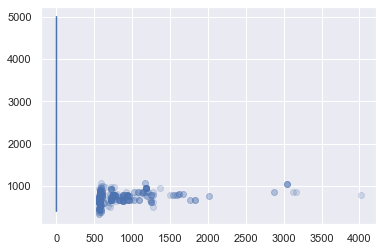

In [132]:
y_pred = lm.predict(x)
plt.scatter(y, y_pred, alpha=0.2)
plt.plot([400,5000],);

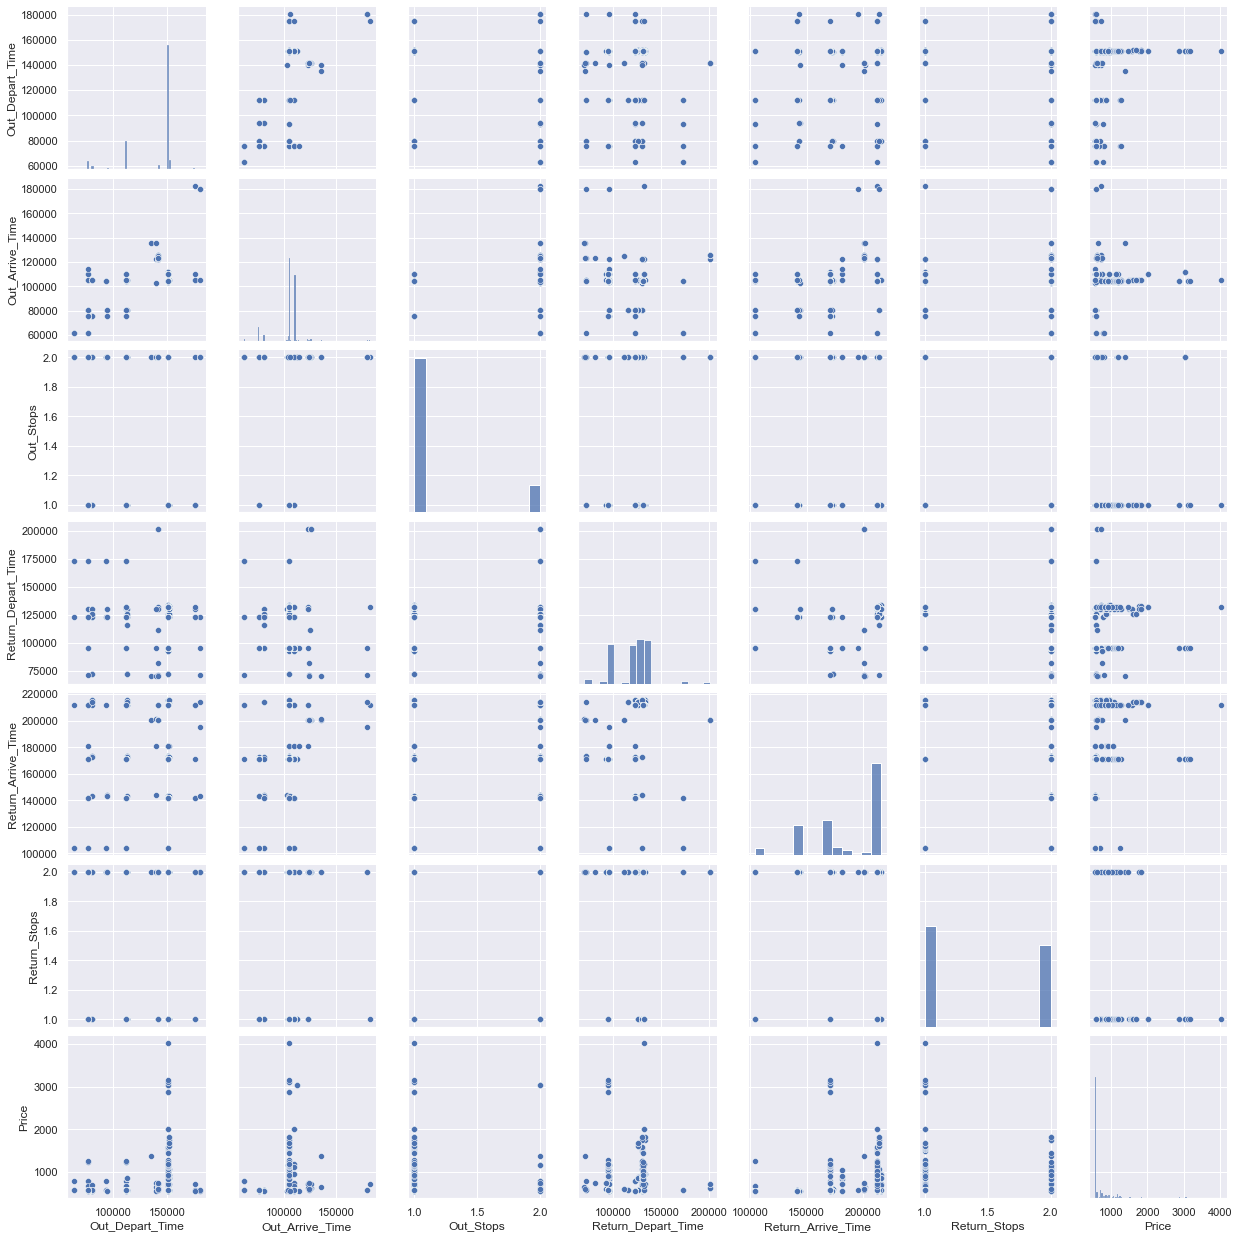

In [134]:
sns.pairplot(flights)


In [136]:
from sklearn import preprocessing
import numpy as np

scaler = preprocessing.StandardScaler().fit(train)
scaler
StandardScaler()

ValueError: could not convert string to float: '1/12'